# People Charm Dataset

To predict whether an employee will quit working in an organization given all the attributes

##  Importing the necessary packages & Reading the Data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [5]:
hr_data= pd.read_csv("People Charm case.csv")
hr_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [6]:
hr_data.shape

(14999, 10)

## Checking for Duplicates or Null Data

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
hr_data.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

#### The above steps imply that there are no Null Values

In [9]:
hr_data.duplicated().sum()

3008

#### It is found that the data has 3008 records which are duplicates, which accounts to 20% of the entire data

In [10]:
hr_data.drop_duplicates(inplace=True)

#### In the above step we are retaining one record and dropping all other duplicates. Because, not dropping duplicates could result in Overfitting of the Model

In [11]:
hr_data.shape

(11991, 10)

##  Data Transformation

In [12]:
hr_data.skew()

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dtype: float64

####  It is observed that the columns- timeSpent.company, workAccident, left & promotionInLast5years are skewed.
#### Since all the above mentioned columns are Right Skewed, hence, Square-Root, Log and Reciprocal Transformations are applied

In [13]:
#Transformations on promotionINLast5years Column:

hr_data['promotionInLast5years1']=np.sqrt(hr_data['promotionInLast5years']) #Square-Root Transformation

hr_data['promotionInLast5years2']=np.log(hr_data['promotionInLast5years']) #Log Transformation

hr_data['promotionInLast5years3']= 1/(hr_data['promotionInLast5years']) #Reciprocal Transformation

hr_data['promotionInLast5years4']= (hr_data['promotionInLast5years'])**1/3  #Cube-Root Transformation

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
#Transformations on timeSpent.company Column:

hr_data['timeSpent.company1']=np.sqrt(hr_data['timeSpent.company'])  #Square-Root Transformation

hr_data['timeSpent.company2']=np.log(hr_data['timeSpent.company'])   #Log Transformation

In [15]:
#Transformations on workAccident Column:

hr_data['workAccident1']=np.sqrt(hr_data['workAccident']) #Square-Root Transformation

hr_data['workAccident2']=np.log(hr_data['workAccident']) #Log Transformation

In [16]:
#Transformations on left Column: 

hr_data['left1']=np.sqrt(hr_data['left'])    #Square-Root Transformation

hr_data['left2']=np.log(hr_data['left'])    #Log Transformation

In [17]:
hr_data.skew()

satisfactoryLevel        -0.538702
lastEvaluation           -0.031686
numberOfProjects          0.332152
avgMonthlyHours           0.027208
timeSpent.company         1.816577
workAccident              1.914410
left                      1.795135
promotionInLast5years     7.490008
promotionInLast5years1    7.490008
promotionInLast5years2         NaN
promotionInLast5years3         NaN
promotionInLast5years4    7.490008
timeSpent.company1        1.104233
timeSpent.company2        0.545446
workAccident1             1.914410
workAccident2                  NaN
left1                     1.795135
left2                          NaN
dtype: float64

#### From the above Transformations, we can the infer the following:
#### 1. For the columns 'promotionInLast5years' , 'workAccident', 'left' the square-root transformation is making no difference on the skewness
#### 2. For the columns 'promotionInLast5years' , 'workAccident', 'left' the log transformation is giving a NaN value because of the 0's present in the data
#### 3. For 'timeSpent.company' we choose to use the column of Log Transformation as the skewness is considerably reduced.

##  Encoding Data

#### We choose to opt for Label Encoding the Data

In [18]:
from sklearn.preprocessing import LabelEncoder
x1=LabelEncoder()                                       #Creating a label-encoder obj
hr_data['dept1']= x1.fit_transform(hr_data['dept'])     #Fitting the label obj to the data
hr_data['salary1']= x1.fit_transform(hr_data['salary']) #Fitting the label obj to the data
hr_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary,...,promotionInLast5years3,promotionInLast5years4,timeSpent.company1,timeSpent.company2,workAccident1,workAccident2,left1,left2,dept1,salary1
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,inf,0.0,1.732051,1.098612,0.0,-inf,1.0,0.0,7,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,inf,0.0,2.449490,1.791759,0.0,-inf,1.0,0.0,7,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,inf,0.0,2.000000,1.386294,0.0,-inf,1.0,0.0,7,2
3,0.37,0.52,2,159,3,0,1,0,sales,low,...,inf,0.0,1.732051,1.098612,0.0,-inf,1.0,0.0,7,1
4,0.41,0.50,2,153,3,0,1,0,sales,low,...,inf,0.0,1.732051,1.098612,0.0,-inf,1.0,0.0,7,1


### Sub-setting the Data:

In [19]:
hr_data1= hr_data[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects','avgMonthlyHours', 'timeSpent.company2', 'workAccident', 'left','promotionInLast5years']]

##  Outlier Analysis

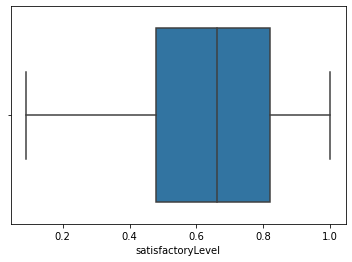

In [20]:
sns.boxplot(hr_data1['satisfactoryLevel'])

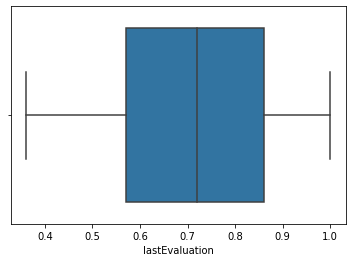

In [21]:
sns.boxplot(hr_data1['lastEvaluation'])

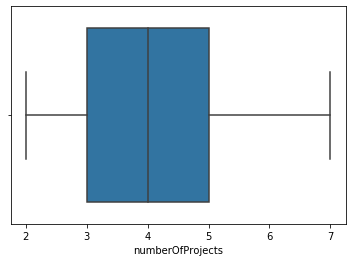

In [22]:
sns.boxplot(hr_data1['numberOfProjects'])

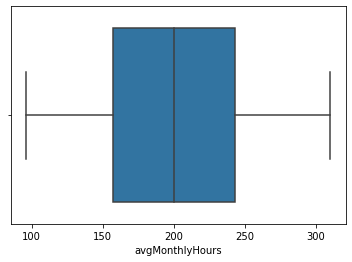

In [23]:
sns.boxplot(hr_data1['avgMonthlyHours'])

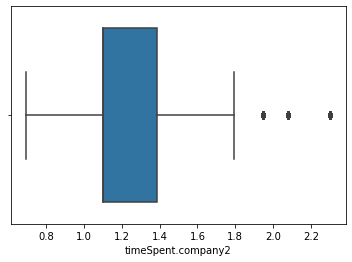

In [24]:
sns.boxplot(hr_data1['timeSpent.company2'])

#### From the above Transformations, we can the infer the following:
#### 1. For the columns 'satisfactoryLevel', 'lastEvaluation', 'numberOfProjects' & 'avgMonthlyHours' there are no Outliers
#### 2. For the columns 'promotionInLast5years' , 'workAccident', 'left' data is 0's and 1's
#### 3. For 'timeSpent.company' there are 282 records which are shown as Outliers, moreover since the Time Spent column denotes the duration an employee has been associated with the organisation, clipping the Outlier will cause data loss,wherein data is essential and relevant

##  Normalization of Data 

#### Data is Normalised using Min-Max Scaler since, the data does not have too many outliers Robust Scaler is not used. Also since the data has a few skewed columns Standard Scaler is not used

In [25]:
from sklearn.preprocessing import MinMaxScaler
mmsc=MinMaxScaler()
mmsc_data= mmsc.fit_transform(hr_data1)
mmsc_data=pd.DataFrame(mmsc_data)
mmsc_data.columns=hr_data1.columns
mmsc_data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company2,workAccident,left,promotionInLast5years
0,0.318681,0.265625,0.0,0.285047,0.251930,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.682606,0.0,1.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.430677,0.0,1.0,0.0
3,0.307692,0.250000,0.0,0.294393,0.251930,0.0,1.0,0.0
4,0.351648,0.218750,0.0,0.266355,0.251930,0.0,1.0,0.0


#### Correlation Matrix:

In [26]:
Matrix= mmsc_data.corr()
Matrix

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company2,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.187007,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.095715,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.201784,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.106296,-0.012860,0.070409,-0.004964
timeSpent.company2,-0.187007,0.095715,0.201784,0.106296,1.000000,-0.010988,0.226361,0.043355
workAccident,0.039940,-0.005695,-0.005612,-0.012860,-0.010988,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.226361,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.043355,0.029852,-0.044657,1.000000


<Figure size 1872x432 with 0 Axes>

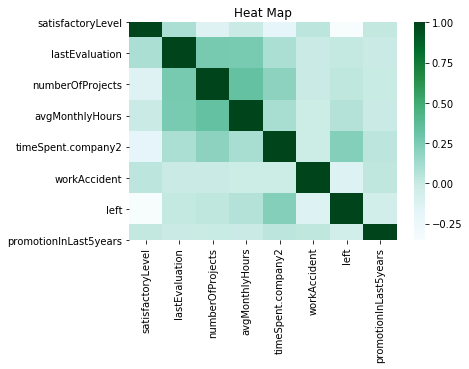

<Figure size 1872x432 with 0 Axes>

In [27]:
dp=sns.heatmap(Matrix,cmap='BuGn')
dp.set(title="Heat Map")
plt.figure(figsize=(26, 6))

## Training the Model

In [28]:
X=hr_data1[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects','avgMonthlyHours', 'timeSpent.company2', 'workAccident','promotionInLast5years']]
Y=hr_data1[['left']]

In [29]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

## Using KNN Algorithm

In [33]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
y_pred= knn.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.9399749895789913


In [35]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1922   85]
 [  59  333]]


In [36]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9035690135545997


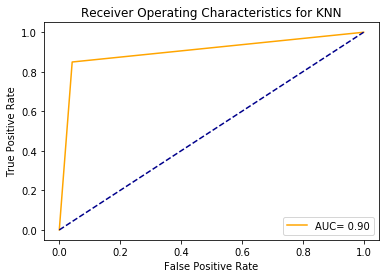

In [37]:
plt.title("Receiver Operating Characteristics for KNN")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##  Using Logistic Regression

In [38]:
LogReg= LogisticRegression()
LogReg= LogReg.fit(x_train,y_train)


print('Coeff: ',LogReg.coef_)
print('Intercept: ',LogReg.intercept_)

Coeff:  [[-3.66267678e+00  5.82767234e-01 -2.93287831e-01  3.28395643e-03
   1.54253007e+00 -1.37275409e+00 -1.08077080e+00]]
Intercept:  [-1.24452313]


C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_pred= LogReg.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.838682784493539


In [40]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1935   72]
 [ 315   77]]


In [41]:
probs= LogReg.predict_proba(x_test)

prob_positive= probs[:,1]
fpr,tpr,threshold= metrics.roc_curve(y_test,prob_positive)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.8492050781448603


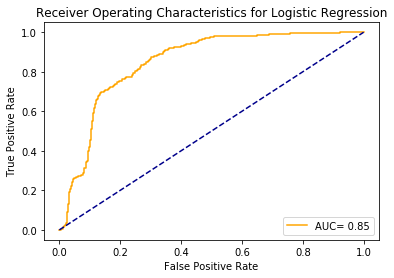

In [42]:
#Plotting ROC curve
plt.title("Receiver Operating Characteristics for Logistic Regression")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Naive Bayes

In [43]:
mnb= MultinomialNB()
mnb=mnb.fit(x_train,y_train)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
y_pred= mnb.predict(x_test)

print("Accuracy Percentage: ",mnb.score(x_test,y_test)*100)

Accuracy Percentage:  83.65985827428095


In [45]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[2007    0]
 [ 392    0]]


In [46]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.5


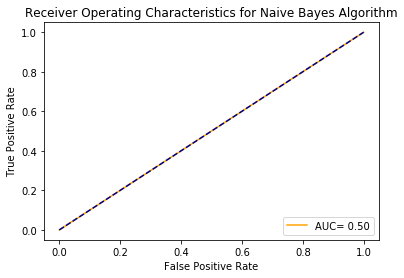

In [47]:
plt.title("Receiver Operating Characteristics for Naive Bayes Algorithm")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Decision Tree

In [48]:
dtc= DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
y_pred= dtc.predict(x_test)
print("Accuracy Score: ",metrics.accuracy_score(y_pred,y_test))

Accuracy Score:  0.9654022509378908


In [50]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1953   54]
 [  29  363]]


In [51]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9495572892834263


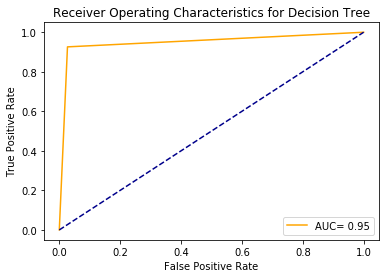

In [52]:
plt.title("Receiver Operating Characteristics for Decision Tree")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Random Forest

In [53]:
rf= RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
y_pred= rf.predict(x_test)
print("Accuracy Score RandomForest: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score RandomForest:  0.9845769070446019


In [55]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[2000    7]
 [  30  362]]


In [56]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9599907975148206


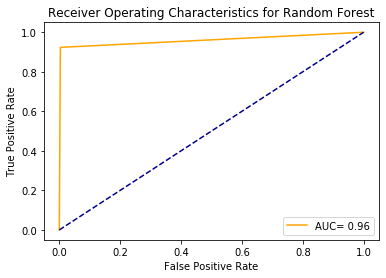

In [57]:
plt.title("Receiver Operating Characteristics for Random Forest")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Ada Boost Classifer

In [58]:
ada= AdaBoostClassifier(n_estimators=100,random_state=0)
ada.fit(x_train,y_train)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [59]:
y_pred= ada.predict(x_test)
print("Accuracy Score of AdaBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score of AdaBoost Classifier:  0.9633180491871614


In [60]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1964   43]
 [  45  347]]


In [61]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9318895345881252


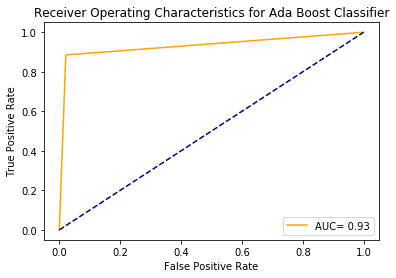

In [62]:
plt.title("Receiver Operating Characteristics for Ada Boost Classifier")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using Gradient Boost Classifer

In [63]:
gradient= GradientBoostingClassifier(n_estimators=100,random_state=0)
gradient.fit(x_train,y_train)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
y_pred= gradient.predict(x_test)
print("Accuracy Score of GradientBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score of GradientBoost Classifier:  0.9808253438932889


In [65]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1989   18]
 [  28  364]]


In [66]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9598014093529789


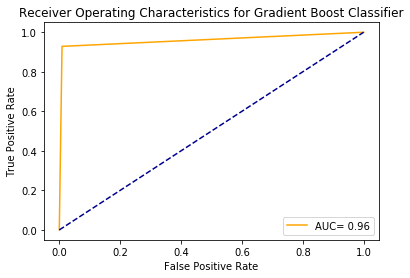

In [67]:
plt.title("Receiver Operating Characteristics for Gradient Boost Classifier")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using XG Boost Classifer

In [68]:
XG= GradientBoostingClassifier(n_estimators=100,random_state=0)
XG.fit(x_train,y_train)

C:\Users\Arpitha Ananth\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [69]:
y_pred= XG.predict(x_test)
print("Accuracy Score of XGBoost Classifier: ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score of XGBoost Classifier:  0.9808253438932889


In [70]:
cm= confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",cm,sep='\n')

Confusion Matrix: 
[[1989   18]
 [  28  364]]


In [71]:
fpr,tpr,threshold= metrics.roc_curve(y_test,y_pred)  
roc_auc= metrics.auc(fpr,tpr)
print("Area under the curve: ",roc_auc)

Area under the curve:  0.9598014093529789


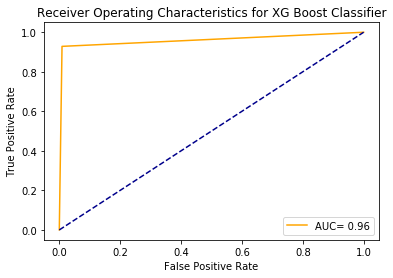

In [72]:
plt.title("Receiver Operating Characteristics for XG Boost Classifier")
plt.plot(fpr,tpr,'orange',label= "AUC= %0.2f" % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##  Inference for the Questions

#### 1. On Comparing the performance of algorithms,  
- **The Highest  Accuracy of 0.9845 is obtained for Random Forest Algorithm.**
- Random Forest as an Algorithm also ensures that the data is not over-fitted, it works for categorical data as well.
- In general beacause of the underlying principle of Random Trees using several Decision Trees to arrive at prediction, makes it more reliable as an Algorithm.

#### 2. Accuracy as a metrics is not adequate to evaluate model performance as it does not look into the Sensitivity and Specificity of Classification. It is computed as (Number of Correct Classification/Total number of Classification), it does not see on what grounds has an element been mis-classified. 
- Instead Confusion Matrix, Area Under Cureve(AUC) of ROC-Receiver Operator Curve can be considered as Model Evaluaters

#### 3. It is observed that 'satisfactoryLevel ', 'promotionInLast5years' and 'workAccident' are inversely related to Attrition. 
- If an Employee has not got a promotion in the last 5 years, there is greater chance that the person might resign from the Organisation.  
- If an Employee is not satisfied with the Organisation, there is higher chances of quitting

#### 4. The attributes 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company2' are directly related to Attrition. 
- If an Employee has been associated for longer period in an organisation, there is more likehood of resignation. 
- If the Last Evaluation of an Employee is not as per his/her expectation there is higher chances of attrition. 
- If an Employee is made to work for more hours on an average, then it increase the likehood of Attrition. 
- If an Employees is not moved into various Projects, then there is higher chances an employee may choose to quit 